# Fundamentos de procesamiento digital de imágenes con scikit-image

Este es un taller introductorio en dónde se expondrán algunos de los algoritmos y conceptos escenciales en el procesamiento digital de imágenes.

## Práctica #1 
Cargar una imágen de la base de datos de ejemplo y visualizarla.

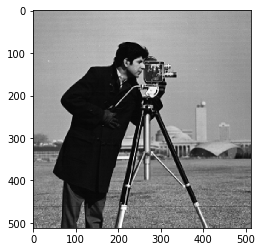

In [2]:
import matplotlib.pyplot as plt
from skimage import data

Img = data.camera()
plt.imshow(Img,cmap='gray')
plt.show()

## Práctica #2
Realizar un filtrado de promedio móvil a camera man.

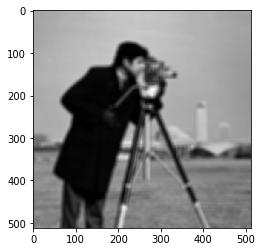

In [9]:
import numpy as np
from scipy import ndimage
from skimage.util import img_as_float

Imf = img_as_float(Img)     #Convierte de uint8 a float
H = np.ones([11,11])*1/11.0 #Kernel de convolución
Ip = ndimage.convolve(Imf,H)

plt.imshow(Ip,cmap='gray')
plt.show()


## Practica #3
Realizar un filtrado gaussiano con $\sigma = 10$ a camera man

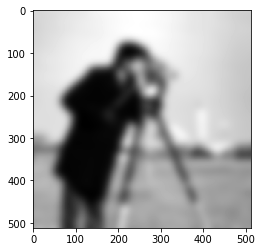

In [11]:
from skimage import filters

Im = data.camera()
Ig = filters.gaussian(Im,sigma=10)

plt.imshow(Ig,cmap='gray')
plt.show()

## Práctica #4
Extraer y visualizar de manera separada los canales RGB de Chelsea The Cat.

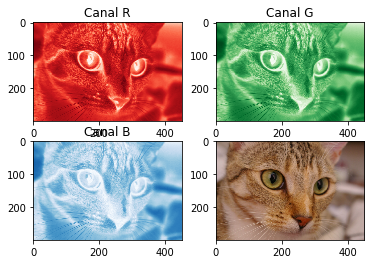

In [33]:
I_RGB = data.chelsea()

I_R =  I_RGB[:,:,0]
I_G =  I_RGB[:,:,1]
I_B =  I_RGB[:,:,2]

plt.subplot(221), plt.imshow(I_R,cmap='Reds'), plt.title('Canal R')
plt.subplot(222), plt.imshow(I_G,cmap='Greens'), plt.title('Canal G')
plt.subplot(223), plt.imshow(I_B,cmap='Blues'), plt.title('Canal B')
plt.subplot(224), plt.imshow(I_RGB)
plt.show()

## Práctica #5
Calcular el valor de umbral con el método de Otsu y obtener una imagen binarizada de Chelsea The Cat. Graficar histograma.

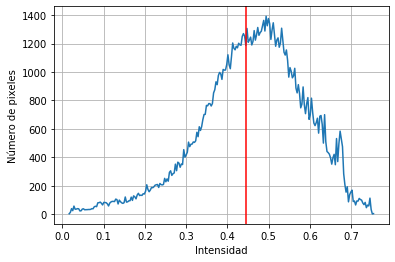

In [21]:
from skimage import exposure, color

Im = data.chelsea()
Im = color.rgb2gray(Im)  #Conversión a escala de grises

#Umbral
Umbral = filters.threshold_otsu(Im) #Cálculo del umbral con el método de Otsu

#Histograma
Hist, centros = exposure.histogram(Im) 

plt.plot(centros,Hist), plt.xlabel('Intensidad'), plt.ylabel(u'Número de pixeles')
plt.axvline(Umbral,color ='r') #Linea de umbral
plt.grid()
plt.show()


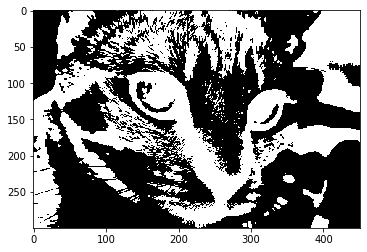

In [23]:
#Binarización
B = Im < Umbral

plt.imshow(B,cmap='gray')

## Práctica #6
Aplicaar el operado de Sobel a coins.

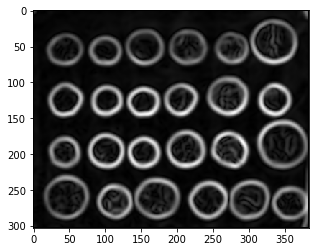

In [27]:
Im = data.coins()
Im = filters.gaussian(Im,sigma=3)
Ibordes = filters.sobel(Im)

plt.imshow(Ibordes,cmap='gray')
plt.show()

## Práctica #7
Obtener el campo de gradiente de Coffee

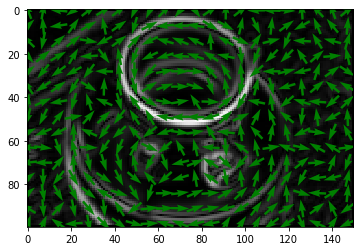

In [76]:
from skimage import transform

Im = data.coffee()
Im = color.rgb2gray(Im)
Im = filters.gaussian(Im,sigma=4)
Ims = transform.rescale(Im,0.25)

I_Sob = filters.sobel(Ims)
I_Sob_X = filters.sobel_h(Ims)
I_Sob_Y = filters.sobel_v(Ims)

plt.imshow(I_Sob,cmap='gray')

m,n = Ims.shape
for i in range(0,m,7):
    for j in range(0,n,7):
        plt.quiver(j,i,I_Sob_X[i][j], I_Sob_Y[i][j], pivot='middle',color='g')
plt.show()

## Práctica final
Realizar una segmantación por umbral de una imágen.

[]

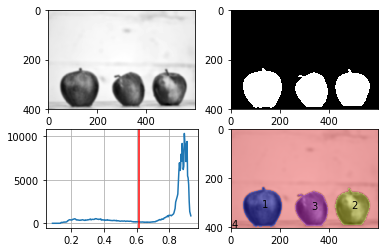

In [79]:
from skimage import io, measure
from scipy import ndimage 

I = io.imread("manzanas.jpg")
I = color.rgb2grey(I)
I = filters.gaussian(I,sigma=3)

hist, centros_hist = exposure.histogram(I)

Umb = filters.threshold_otsu(I)
B = I < T

B = ndimage.binary_fill_holes(B).astype(int) # Rellenar agujeros en la imágen binaria

# Etiquetado de elementos binarios 
label_image = measure.label(B)
image_label_overlay = color.label2rgb(label_image, image=I)

Regiones = measure.regionprops(label_image)

plt.subplot(221),plt.imshow(I,cmap='gray')
plt.subplot(222),plt.imshow(B,cmap='gray')
plt.subplot(223),plt.plot(centros_hist,hist), plt.grid(True), plt.axvline(Umb,color='r') 
plt.subplot(224),plt.imshow(image_label_overlay)

for r in Regiones:
    plt.text(r.centroid[1],r.centroid[0],str(r.label))

plt.plot()